Fourier Transform of an Image and perform Low Pass Filter, High Pass Filter and Band Pass Filter in Frequency domain by Muliplication with a Mask

In [2]:
from google.colab import files
uploaded = files.upload()

Saving elephant.jpeg to elephant.jpeg


In [58]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt 

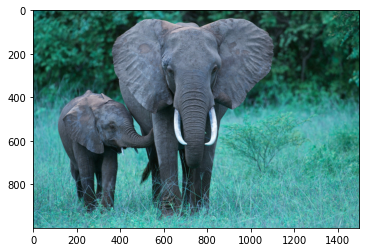

In [59]:
elephant = cv2.imread('/content/elephant.jpeg')
plotImage= plt.imshow(elephant, cmap= 'brg')
plt.show()

In [84]:
#Fourier Transform
elephantGray = cv2.cvtColor(elephant, cv2.COLOR_BGR2GRAY)


dft = cv2.dft(np.float32(elephantGray),flags = cv2.DFT_COMPLEX_OUTPUT)
dftShift = np.fft.fftshift(dft)
#magintude
magnitude = 20*np.log(cv2.magnitude(dftShift[:,:,0],dftShift[:,:,1]))
#phase
phase = cv2.phase(dftShift[:,:,0],dftShift[:,:,1])


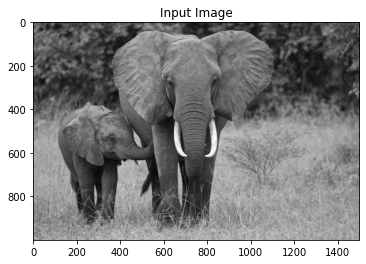

In [85]:
plt.imshow(elephantGray, cmap = 'gray')
plt.title('Input Image')
plt.show()

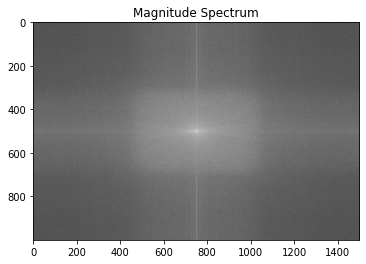

In [86]:
plt.imshow(magnitude, cmap = 'gray')
plt.title('Magnitude Spectrum')
plt.show()

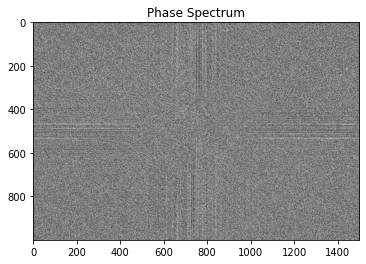

In [87]:
plt.imshow(phase, cmap = 'gray')
plt.title('Phase Spectrum')
plt.show()

In [98]:
#low pass filtering
rows, cols = elephantGray.shape
centerX, centerY = rows//2 , cols//2

mask = np.zeros((rows, cols,2), np.uint8)
mask[centerX-40:centerX+40, centerY-40:centerY+40] = 1

lowPassShift = dftShift*mask
fInvShift = np.fft.ifftshift(lowPassShift)

imgBack = cv2.idft(fInvShift)
imgBack = cv2.magnitude(imgBack[:,:,0],imgBack[:,:,1])

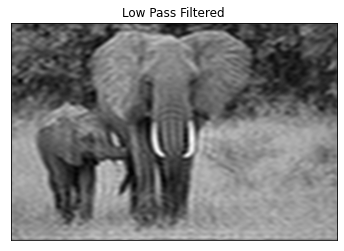

In [99]:
plt.imshow(imgBack, cmap = 'gray')
plt.title('Low Pass Filtered'), plt.xticks([]), plt.yticks([])
plt.show()

In [100]:
#high pass filter 
mask = np.ones((rows, cols,2), np.uint8)
mask[centerX-40:centerX+40, centerY-40:centerY+40] = 0

hpshift = dftShift*mask 

fInvShift = np.fft.ifftshift(hpshift)
imgBack = cv2.idft(fInvShift)
imgBack = cv2.magnitude(imgBack[:,:,0],imgBack[:,:,1])


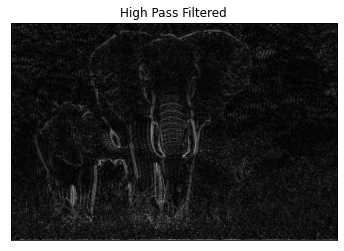

In [101]:
plt.imshow(imgBack, cmap = 'gray')
plt.title('High Pass Filtered'), plt.xticks([]), plt.yticks([])

plt.show()

In [112]:
#band pass filter 
mask = np.zeros((rows, cols,2), np.uint8)
mask[centerX+40:centerX+200, centerY+40:centerY+200] = 1
mask[centerX-200: centerX-40, centerY-200:centerY-40] = 1

bpShift = dftShift*mask 

fInvShift = np.fft.ifftshift(bpShift)
imgBack = cv2.idft(fInvShift)
imgBack = cv2.magnitude(imgBack[:,:,0],imgBack[:,:,1])


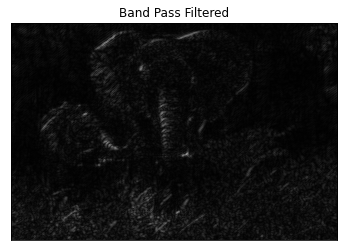

In [113]:
plt.imshow(imgBack, cmap = 'gray')
plt.title('Band Pass Filtered'), plt.xticks([]), plt.yticks([])

plt.show()